In [2]:
import numpy as np
import math
from fractions import Fraction
from tqdm import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt
import os
import random
import matplotlib
from matplotlib.colors import Normalize,FuncNorm,LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from haversine import haversine, Unit
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from matplotlib.ticker import FixedLocator,FuncFormatter

In [6]:
data=[]
file_list=["data/supply_demand_ratio_official.npy",
           "data/supply_demand_ratio_official_megareduce.npy",
           "data/supply_demand_ratio_official_starlink.npy",
           "data/supply_demand_ratio_backbone.npy",
           "data/supply_demand_ratio_backbone_megareduce.npy",
           "data/supply_demand_ratio_backbone_starlink.npy",
           "data/supply_demand_ratio_south.npy",
           "data/supply_demand_ratio_south_megareduce.npy",
           "data/supply_demand_ratio_south_starlink.npy"
          ]
for file in file_list:
    data.append(np.load(file,allow_pickle=True))
print(len(data))

9


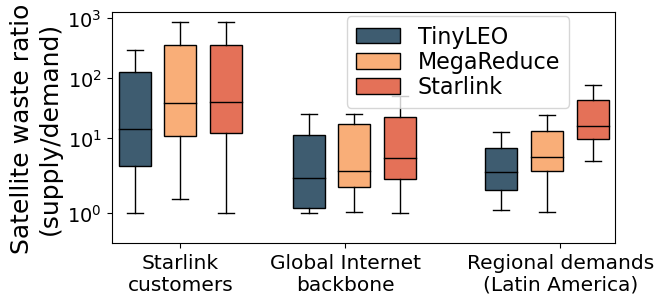

In [11]:
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(6.5, 3))

colors = ['#3E5C70', '#F9AE78', '#E47158',
          '#3E5C70', '#F9AE78', '#E47158',
          '#3E5C70', '#F9AE78', '#E47158']

bp = ax.boxplot(
    data,
    positions=[0, 1, 2, 3.8, 4.8, 5.8, 8, 9, 10],
    showfliers=False,
    widths=0.7,
    patch_artist=True,
    whiskerprops=dict(color='black', linewidth=1),
    capprops=dict(color='black', linewidth=1),
    medianprops=dict(color='black', linewidth=1)
)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Satellite waste ratio\n(supply/demand)", fontsize=18)
plt.yscale("symlog")
plt.yticks(fontsize=14)
plt.xticks([1, 4.6, 9.3], ["Starlink\ncustomers", "Global Internet\nbackbone", "Regional demands\n(Latin America)"], fontsize=14.5)

legend_handles = [
    patches.Patch(facecolor="#3E5C70", edgecolor='black', label='TinyLEO'),
    patches.Patch(facecolor="#F9AE78", edgecolor='black', label='MegaReduce'),
    patches.Patch(facecolor="#E47158", edgecolor='black', label='Starlink')
]

plt.xlim(-0.5, 10.5)
ax.legend(handles=legend_handles, fontsize=16, loc='upper right', borderaxespad=0.5, labelspacing=0.1, bbox_to_anchor=(0.93, 1.03))
plt.ylim(bottom=0.1)
plt.savefig("figure15b.pdf", transparent=True, bbox_inches="tight")
plt.savefig("figure15b.png", transparent=True, bbox_inches="tight")